In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Preparation

In [2]:
# Load data
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

In [3]:

max_tokens = 10000  # Maximum number of words to keep
max_sequence_length = 100  # Maximum length of text sequences


text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

# Adapt the vectorizer to the training data
text_vectorizer.adapt(train_df['text'].values)

# Convert labels to numeric
label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

# Prepare datasets
x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

In [4]:
### Variasi 1: 32 cells per layer
model_1 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(32, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3453 - loss: 1.1204 - val_accuracy: 0.3800 - val_loss: 1.0828
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3509 - loss: 1.0942 - val_accuracy: 0.3800 - val_loss: 1.0646
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5292 - loss: 0.9900 - val_accuracy: 0.4000 - val_loss: 1.0803
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5880 - loss: 0.8731 - val_accuracy: 0.4300 - val_loss: 1.0954
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6707 - loss: 0.6942 - val_accuracy: 0.3800 - val_loss: 1.1603
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7677 - loss: 0.5507 - val_accuracy: 0.3700 - val_loss: 1.2556
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8450 - loss: 0.4310 - val_accuracy: 0.4200 - val_loss: 1.4135
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8802 - loss: 0.3102 - val_accuracy: 0.3700 - val_loss: 1.6028
Epoch 9/20


In [5]:
### Variasi 2: 64 cells per layer
model_2 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3146 - loss: 1.1332 - val_accuracy: 0.3800 - val_loss: 1.0802
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4422 - loss: 1.0611 - val_accuracy: 0.4400 - val_loss: 1.1230
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6113 - loss: 0.8849 - val_accuracy: 0.4500 - val_loss: 1.1615
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7634 - loss: 0.6652 - val_accuracy: 0.4800 - val_loss: 1.2452
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8460 - loss: 0.4659 - val_accuracy: 0.4100 - val_loss: 1.5001
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9473 - loss: 0.2244 - val_accuracy: 0.4100 - val_loss: 1.7089
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9772 - loss: 0.0932 - val_accuracy: 0.4300 - val_loss: 1.9254
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9951 - loss: 0.0303 - val_accuracy: 0.3800 - val_loss: 2.0861


In [7]:
### Variasi 3: 128 cells per layer
model_3 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3572 - loss: 1.1359 - val_accuracy: 0.3800 - val_loss: 1.0998
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4186 - loss: 1.0721 - val_accuracy: 0.4000 - val_loss: 1.1060
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4666 - loss: 1.0442 - val_accuracy: 0.3200 - val_loss: 1.2271
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5401 - loss: 1.0124 - val_accuracy: 0.3800 - val_loss: 1.2443
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5530 - loss: 0.9397 - val_accuracy: 0.3500 - val_loss: 1.2437
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6314 - loss: 0.8434 - val_accuracy: 0.4400 - val_loss: 1.2962
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5355 - loss: 0.9486 - val_accuracy: 0.4000 - val_loss: 1.1966
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4669 - loss: 1.0505 - val_accuracy: 0.3800 - val_loss: 1.1115



Evaluating Model 1 (32 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        38
           1       0.33      0.21      0.26        24
           2       0.43      0.55      0.48        38

    accuracy                           0.45       100
   macro avg       0.43      0.42      0.42       100
weighted avg       0.44      0.45      0.44       100

Macro F1-score: 0.4176


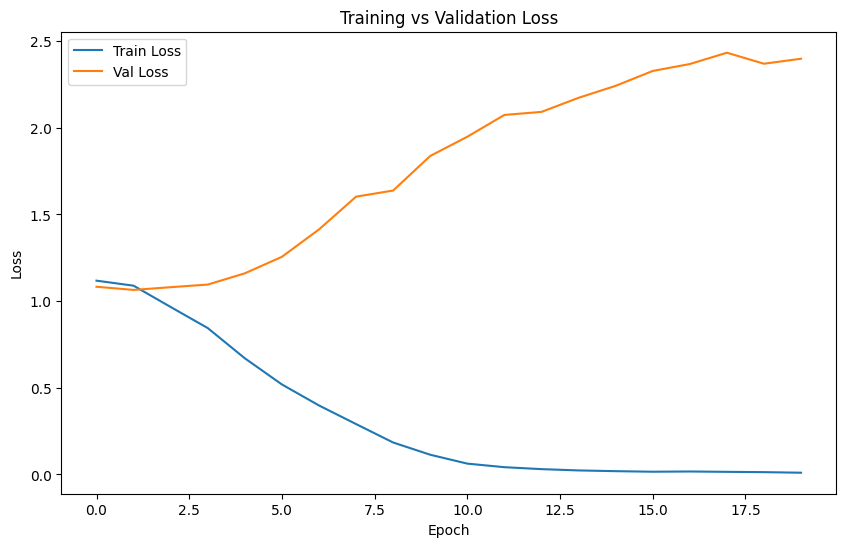


Evaluating Model 2 (64 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.51      0.61      0.55        38
           1       0.33      0.29      0.31        24
           2       0.32      0.29      0.31        38

    accuracy                           0.41       100
   macro avg       0.39      0.40      0.39       100
weighted avg       0.40      0.41      0.40       100

Macro F1-score: 0.3903


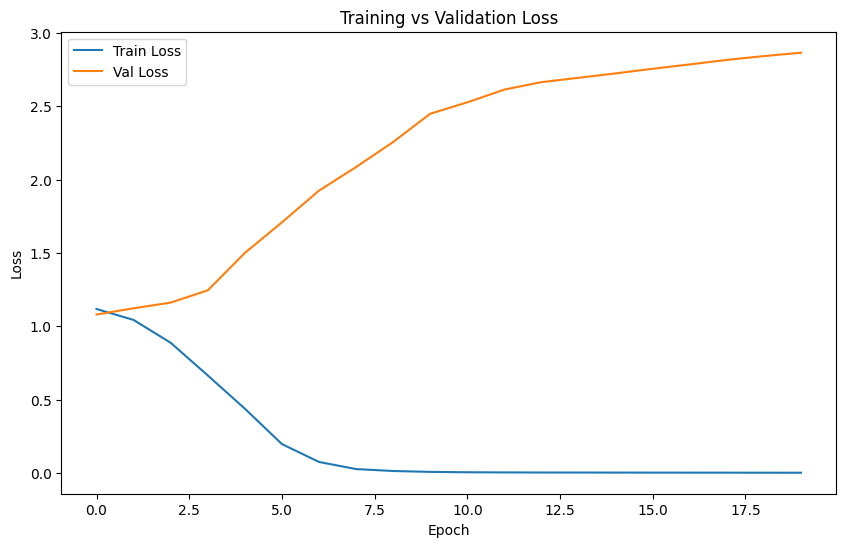


Evaluating Model 3 (128 cells per layer):
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30a0d78b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.56      0.42      0.48        24

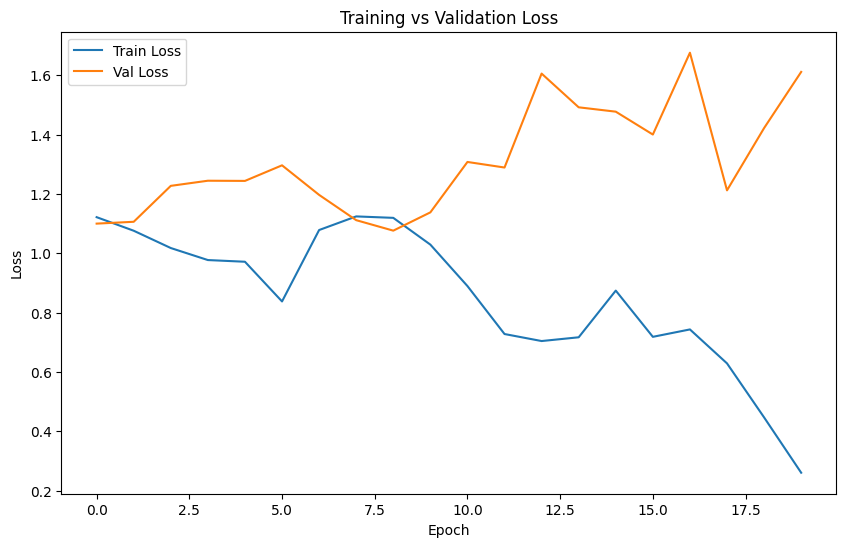

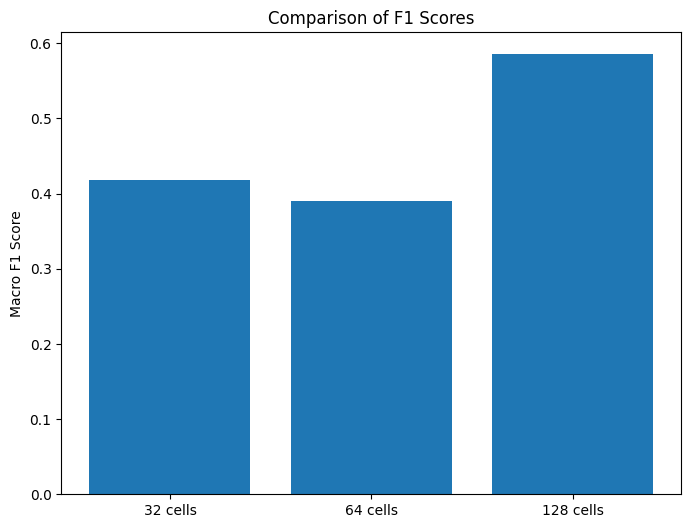

In [8]:
# Evaluate all models
print("\nEvaluating Model 1 (32 cells per layer):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

print("\nEvaluating Model 2 (64 cells per layer):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

print("\nEvaluating Model 3 (128 cells per layer):")
f1_3 = evaluate_model(model_3, x_val, y_val, history_3)

# Compare F1 scores
plt.figure(figsize=(8, 6))
plt.bar(['32 cells', '64 cells', '128 cells'], [f1_1, f1_2, f1_3])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()